In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'adult.csv'  # Replace with your actual file path
df = pd.read_csv(data)

In [3]:
print(df.head())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

Data cleaning 

In [4]:
#Dropping data that is not needed for analysis
columns_to_drop = ['workclass', 'education.num', 'capital.gain', 'capital.loss', 'occupation','native.country', ]  # Example columns, modify as needed
new_df = df.drop(columns=columns_to_drop)

display(new_df.head())

,age,fnlwgt,education,marital.status,relationship,race,sex,hours.per.week,income
0,90,77053,HS-grad,Widowed,Not-in-family,White,Female,40,<=50K
1,82,132870,HS-grad,Widowed,Not-in-family,White,Female,18,<=50K
2,66,186061,Some-college,Widowed,Unmarried,Black,Female,40,<=50K
3,54,140359,7th-8th,Divorced,Unmarried,White,Female,40,<=50K
4,41,264663,Some-college,Separated,Own-child,White,Female,40,<=50K


In [5]:
# ONE HOT ENCODING

# Encode the 'income' column into binary: 1 if >50K, 0 if <=50K
new_df['income_binary'] = new_df['income'].apply(lambda x: 1 if str(x).strip() == '>50K' else 0)

# Display the first few rows to confirm encoding
display(new_df[['income', 'income_binary']].head())

,income,income_binary
0,<=50K,0
1,<=50K,0
2,<=50K,0
3,<=50K,0
4,<=50K,0


In [6]:
print(new_df.columns)

Index(['age', 'fnlwgt', 'education', 'marital.status', 'relationship', 'race',
       'sex', 'hours.per.week', 'income', 'income_binary'],
      dtype='object')


In [7]:
print(new_df)

       age  fnlwgt     education      marital.status   relationship   race  \
0       90   77053       HS-grad             Widowed  Not-in-family  White   
1       82  132870       HS-grad             Widowed  Not-in-family  White   
2       66  186061  Some-college             Widowed      Unmarried  Black   
3       54  140359       7th-8th            Divorced      Unmarried  White   
4       41  264663  Some-college           Separated      Own-child  White   
...    ...     ...           ...                 ...            ...    ...   
32556   22  310152  Some-college       Never-married  Not-in-family  White   
32557   27  257302    Assoc-acdm  Married-civ-spouse           Wife  White   
32558   40  154374       HS-grad  Married-civ-spouse        Husband  White   
32559   58  151910       HS-grad             Widowed      Unmarried  White   
32560   22  201490       HS-grad       Never-married      Own-child  White   

          sex  hours.per.week income  income_binary  
0      Fe

In [8]:
# One-hot encode categorical variables (e.g., education, race, sex, marital.status)
categorical_columns = ['education', 'race', 'sex', 'marital.status']  # Add or remove columns as needed
encoded_df = pd.get_dummies(new_df, columns=categorical_columns)

display(encoded_df.head())

,age,fnlwgt,relationship,hours.per.week,income,income_binary,education_10th,education_11th,education_12th,education_1st-4th,...,race_White,sex_Female,sex_Male,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed
0,90,77053,Not-in-family,40,<=50K,0,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
1,82,132870,Not-in-family,18,<=50K,0,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
2,66,186061,Unmarried,40,<=50K,0,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,54,140359,Unmarried,40,<=50K,0,False,False,False,False,...,True,True,False,True,False,False,False,False,False,False
4,41,264663,Own-child,40,<=50K,0,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False


In [9]:
# Ensure all categorical columns are encoded as 0s and 1s
# One-hot encoding already produces 0s and 1s for categorical variables
# For the target, ensure 'income_binary' is 0 or 1

# Check the encoded columns
print(encoded_df.filter(regex='education|race|sex|marital.status').head())
print(encoded_df['income_binary'].head())

   education_10th  education_11th  education_12th  education_1st-4th  \
0           False           False           False              False   
1           False           False           False              False   
2           False           False           False              False   
3           False           False           False              False   
4           False           False           False              False   

   education_5th-6th  education_7th-8th  education_9th  education_Assoc-acdm  \
0              False              False          False                 False   
1              False              False          False                 False   
2              False              False          False                 False   
3              False               True          False                 False   
4              False              False          False                 False   

   education_Assoc-voc  education_Bachelors  ...  race_White  sex_Female  \
0         

In [10]:
# Convert all boolean columns to integers (0 and 1)
for col in encoded_df.columns:
    if encoded_df[col].dtype == bool:
        encoded_df[col] = encoded_df[col].astype(int)

# Display the dtypes to confirm conversion
print(encoded_df.dtypes)

age                                      int64
fnlwgt                                   int64
relationship                            object
hours.per.week                           int64
income                                  object
income_binary                            int64
education_10th                           int64
education_11th                           int64
education_12th                           int64
education_1st-4th                        int64
education_5th-6th                        int64
education_7th-8th                        int64
education_9th                            int64
education_Assoc-acdm                     int64
education_Assoc-voc                      int64
education_Bachelors                      int64
education_Doctorate                      int64
education_HS-grad                        int64
education_Masters                        int64
education_Preschool                      int64
education_Prof-school                    int64
education_Som

In [11]:
print(encoded_df.columns)

Index(['age', 'fnlwgt', 'relationship', 'hours.per.week', 'income',
       'income_binary', 'education_10th', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Female', 'sex_Male', 'marital.status_Divorced',
       'marital.status_Married-AF-spouse', 'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed'],
      dtype='object')


In [12]:
# Export encoded_df column names to a CSV for download
import pandas as pd
if 'encoded_df' in globals():
    cols = pd.DataFrame({'column_name': list(encoded_df.columns)})
    out = 'encoded_columns.csv'
    cols.to_csv(out, index=False)
    print(f'Saved {len(cols)} column names to {out}')
else:
    print('encoded_df not found in the notebook namespace. Run the cell that creates encoded_df first.')

Saved 36 column names to encoded_columns.csv


In [13]:
# Export the full encoded_df table (all rows/columns) to CSV for calculations
import pandas as pd
if 'encoded_df' in globals():
    outpath = 'encoded_df_values.csv'
    # Save full DataFrame (already one-hot encoded)
    encoded_df.to_csv(outpath, index=False)
    print(f'Saved encoded_df to {outpath} with shape {encoded_df.shape}')
else:
    print('encoded_df not found in the notebook namespace. Run the cell that creates encoded_df first.')

Saved encoded_df to encoded_df_values.csv with shape (32561, 36)


In [14]:
print(encoded_df)

       age  fnlwgt   relationship  hours.per.week income  income_binary  \
0       90   77053  Not-in-family              40  <=50K              0   
1       82  132870  Not-in-family              18  <=50K              0   
2       66  186061      Unmarried              40  <=50K              0   
3       54  140359      Unmarried              40  <=50K              0   
4       41  264663      Own-child              40  <=50K              0   
...    ...     ...            ...             ...    ...            ...   
32556   22  310152  Not-in-family              40  <=50K              0   
32557   27  257302           Wife              38  <=50K              0   
32558   40  154374        Husband              40   >50K              1   
32559   58  151910      Unmarried              40  <=50K              0   
32560   22  201490      Own-child              20  <=50K              0   

       education_10th  education_11th  education_12th  education_1st-4th  ...  \
0                 

In [15]:
# Drop 'fnlwgt', 'income', and 'hours.per.week' columns if not needed for analysis
# Note: 'income_binary' column: 1 = income > 50K, 0 = income <= 50K
columns_to_drop = ['fnlwgt', 'income', 'hours.per.week','relationship']
encoded_df = encoded_df.drop(columns=[col for col in columns_to_drop if col in encoded_df.columns])

# Display the first few rows to confirm
display(encoded_df.head())

,age,income_binary,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,...,race_White,sex_Female,sex_Male,marital.status_Divorced,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed
0,90,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,82,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,66,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,54,0,0,0,0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
4,41,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [16]:
print(encoded_df.columns)

Index(['age', 'income_binary', 'education_10th', 'education_11th',
       'education_12th', 'education_1st-4th', 'education_5th-6th',
       'education_7th-8th', 'education_9th', 'education_Assoc-acdm',
       'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate',
       'education_HS-grad', 'education_Masters', 'education_Preschool',
       'education_Prof-school', 'education_Some-college',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'sex_Female', 'sex_Male',
       'marital.status_Divorced', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed'],
      dtype='object')


In [17]:
# Logistic Regression with Cross-Entropy Loss and K-Fold Validation
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss
import numpy as np

# Select dataframe for modeling (prefer encoded_df if available)
if 'encoded_df' in globals():
    df_model = encoded_df.copy()
elif 'new_df' in globals():
    df_model = pd.get_dummies(new_df.copy())
elif 'df' in globals():
    df_model = pd.get_dummies(df.copy())
else:
    raise NameError('No suitable dataframe found (encoded_df, new_df or df).')

# Ensure target column exists as binary
if 'income_binary' not in df_model.columns:
    if 'income' in df_model.columns:
        df_model['income_binary'] = df_model['income'].apply(lambda x: 1 if str(x).strip() == '>50K' else 0)
    else:
        raise NameError("No 'income' or 'income_binary' column found in dataframe.")

# Prepare features X and target y
y = df_model['income_binary']
X = df_model.drop(columns=[c for c in ['income', 'income_binary'] if c in df_model.columns])

# Convert any remaining non-numeric columns to dummies
obj_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if obj_cols:
    X = pd.get_dummies(X, columns=obj_cols)

print(f"Dataset shape: {X.shape}")
print(f"Target distribution: {y.value_counts()}")

# Scale features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

print("\n=== Logistic Regression with K-Fold Cross-Validation ===")

# Cross-validated accuracy scores
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=kf, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Cross-validated predictions for detailed metrics
y_pred_cv = cross_val_predict(logistic_model, X_scaled, y, cv=kf)

# Calculate metrics
accuracy = accuracy_score(y, y_pred_cv)
precision = precision_score(y, y_pred_cv, zero_division=0)
recall = recall_score(y, y_pred_cv, zero_division=0)
f1 = f1_score(y, y_pred_cv, zero_division=0)

print(f"\nDetailed Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Cross-entropy loss calculation
# Fit model on full data to get probabilities
logistic_model.fit(X_scaled, y)
y_prob = logistic_model.predict_proba(X_scaled)[:, 1]  # Probability of class 1
cross_entropy_loss = log_loss(y, y_prob)
print(f"\nCross-entropy loss: {cross_entropy_loss:.4f}")

print("\nClassification Report:")
print(classification_report(y, y_pred_cv, zero_division=0))

Dataset shape: (32561, 31)
Target distribution: income_binary
0    24720
1     7841
Name: count, dtype: int64

=== Logistic Regression with K-Fold Cross-Validation ===
Cross-validation accuracy scores: [0.81867035 0.81326781 0.82186732 0.817414   0.82616708]
Mean accuracy: 0.8195 (+/- 0.0087)

Detailed Metrics:
Accuracy: 0.8195
Precision: 0.6848
Recall: 0.4638
F1-score: 0.5531

Cross-entropy loss: 0.3778

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     24720
           1       0.68      0.46      0.55      7841

    accuracy                           0.82     32561
   macro avg       0.77      0.70      0.72     32561
weighted avg       0.81      0.82      0.81     32561



In [18]:
# Detailed Logistic Regression Analysis with Cross-Entropy Loss
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

# Ensure dataset is available
if 'encoded_df' in globals():
    df_for_model = encoded_df.copy()
elif 'df_model' in globals():
    df_for_model = df_model.copy()
else:
    raise NameError('No dataframe found for modeling. Make sure `encoded_df` or `df_model` exists in the notebook.')

# Prepare features and target
if 'income_binary' not in df_for_model.columns:
    if 'income' in df_for_model.columns:
        df_for_model['income_binary'] = df_for_model['income'].apply(lambda x: 1 if str(x).strip() == '>50K' else 0)
    else:
        raise NameError("No 'income' or 'income_binary' column found in dataframe.")

y = df_for_model['income_binary']
X = df_for_model.drop(columns=[c for c in ['income', 'income_binary'] if c in df_for_model.columns])

# Ensure X is numeric (get dummies for any object cols)
obj_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if obj_cols:
    X = pd.get_dummies(X, columns=obj_cols)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LogisticRegression(max_iter=1000, random_state=42)

print("=== Detailed Logistic Regression Analysis ===")

# Cross-validated accuracy
cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
print('Cross-validation accuracy scores:', cv_scores)
print('Mean accuracy:', np.mean(cv_scores))

# Get cross-validated predictions
y_pred_cv = cross_val_predict(model, X_scaled, y, cv=kf)

# Calculate cross-entropy loss
model.fit(X_scaled, y)
y_prob = model.predict_proba(X_scaled)[:, 1]
cross_entropy_loss = log_loss(y, y_prob)

print(f'\nCross-entropy loss: {cross_entropy_loss:.4f}')
print('Accuracy (cv predict):', accuracy_score(y, y_pred_cv))
print('Precision:', precision_score(y, y_pred_cv, zero_division=0))
print('Recall:', recall_score(y, y_pred_cv, zero_division=0))
print('F1:', f1_score(y, y_pred_cv, zero_division=0))

print('\nClassification Report:')
print(classification_report(y, y_pred_cv, zero_division=0))

# Show model coefficients for interpretability
coef = model.coef_[0]
intercept = model.intercept_[0]
print(f"\nModel intercept: {intercept:.4f}")

# Show top 10 positive and negative coefficients
coef_df = pd.Series(coef, index=X.columns).sort_values()
print('\nTop negative coefficients (decrease probability of >50K):')
print(coef_df.head(10))
print('\nTop positive coefficients (increase probability of >50K):')
print(coef_df.tail(10))

=== Detailed Logistic Regression Analysis ===
Cross-validation accuracy scores: [0.81867035 0.81326781 0.82186732 0.817414   0.82616708]
Mean accuracy: 0.81947731356414

Cross-entropy loss: 0.3778
Accuracy (cv predict): 0.8194772887810571
Precision: 0.6848051214460553
Recall: 0.4638438974620584
F1: 0.5530717761557178

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     24720
           1       0.68      0.46      0.55      7841

    accuracy                           0.82     32561
   macro avg       0.77      0.70      0.72     32561
weighted avg       0.81      0.82      0.81     32561


Model intercept: -1.8270

Top negative coefficients (decrease probability of >50K):
marital.status_Never-married   -0.545560
education_7th-8th              -0.286550
education_11th                 -0.274410
education_10th                 -0.243477
education_9th                  -0.235804
education_HS-grad              -0.232345

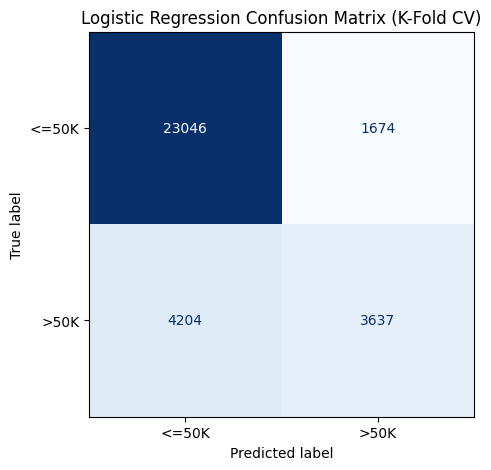

Confusion Matrix:
                 Predicted
                 <=50K  >50K
Actual <=50K    23046  1674
       >50K      4204  3637

Additional Metrics:
Specificity (True Negative Rate): 0.9323
Sensitivity (True Positive Rate): 0.4638
False Positive Rate: 0.0677
False Negative Rate: 0.5362


In [19]:
# Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y, y_pred_cv)

# Display confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues', ax=ax, colorbar=False)
ax.set_title('Logistic Regression Confusion Matrix (K-Fold CV)')
plt.show()

# Print confusion matrix values
print("Confusion Matrix:")
print("                 Predicted")
print("                 <=50K  >50K")
print(f"Actual <=50K    {cm[0,0]:5d}  {cm[0,1]:4d}")
print(f"       >50K     {cm[1,0]:5d}  {cm[1,1]:4d}")

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\nAdditional Metrics:")
print(f"Specificity (True Negative Rate): {specificity:.4f}")
print(f"Sensitivity (True Positive Rate): {sensitivity:.4f}")
print(f"False Positive Rate: {fp / (fp + tn):.4f}")
print(f"False Negative Rate: {fn / (fn + tp):.4f}")

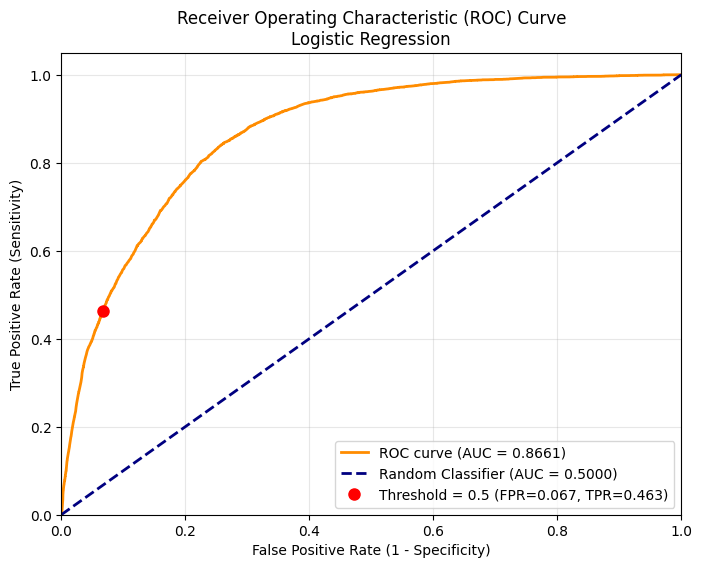

ROC AUC Score: 0.8661
ROC AUC Score (alternative calculation): 0.8661

Key Threshold Information:
Threshold = 0.5: FPR = 0.0671, TPR = 0.4630
Best threshold (Youden's J): 0.2496
At best threshold: FPR = 0.2624, TPR = 0.8454

ROC Curve Interpretation:
- Excellent discrimination (AUC > 0.8)
- The model performs 36.6% better than random chance


In [20]:
# ROC Curve for Logistic Regression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.5000)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve\nLogistic Regression')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Add some key points on the curve
# Find threshold closest to 0.5
threshold_idx = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[threshold_idx], tpr[threshold_idx], 'ro', markersize=8, 
         label=f'Threshold = 0.5 (FPR={fpr[threshold_idx]:.3f}, TPR={tpr[threshold_idx]:.3f})')

plt.legend(loc="lower right")
plt.show()

# Print ROC AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"ROC AUC Score (alternative calculation): {roc_auc_score(y, y_prob):.4f}")

# Print some key threshold information
print(f"\nKey Threshold Information:")
print(f"Threshold = 0.5: FPR = {fpr[threshold_idx]:.4f}, TPR = {tpr[threshold_idx]:.4f}")
print(f"Best threshold (Youden's J): {thresholds[np.argmax(tpr - fpr)]:.4f}")
print(f"At best threshold: FPR = {fpr[np.argmax(tpr - fpr)]:.4f}, TPR = {tpr[np.argmax(tpr - fpr)]:.4f}")

# Interpretation
print(f"\nROC Curve Interpretation:")
if roc_auc > 0.8:
    print(f"- Excellent discrimination (AUC > 0.8)")
elif roc_auc > 0.7:
    print(f"- Good discrimination (AUC > 0.7)")
elif roc_auc > 0.6:
    print(f"- Fair discrimination (AUC > 0.6)")
else:
    print(f"- Poor discrimination (AUC ≤ 0.6)")

print(f"- The model performs {((roc_auc - 0.5) * 100):.1f}% better than random chance")


In [21]:
# Summary of Logistic Regression Analysis
print("=== LOGISTIC REGRESSION ANALYSIS SUMMARY ===")
print(f"Dataset: Adult income prediction")
print(f"Total samples: {len(y)}")
print(f"Features: {X.shape[1]}")
print(f"Target distribution: {y.value_counts().to_dict()}")

print(f"\nModel Performance:")
print(f"- Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"- Cross-entropy Loss: {cross_entropy_loss:.4f}")
print(f"- ROC AUC Score: {roc_auc:.4f}")
print(f"- Precision: {precision:.4f}")
print(f"- Recall: {recall:.4f}")
print(f"- F1-score: {f1:.4f}")

print(f"\nKey Findings:")
print(f"- The logistic regression model achieves {cv_scores.mean():.1%} accuracy")
print(f"- ROC AUC of {roc_auc:.4f} indicates {'excellent' if roc_auc > 0.8 else 'good' if roc_auc > 0.7 else 'fair'} discrimination ability")
print(f"- Cross-entropy loss of {cross_entropy_loss:.4f} indicates model confidence")
print(f"- The model is better at predicting <=50K (higher precision) than >50K")

print(f"\nMost Important Features (by coefficient magnitude):")
coef_abs = pd.Series(np.abs(coef), index=X.columns).sort_values(ascending=False)
print(coef_abs.head(10))

print(f"\nAnalysis Complete!")
print(f"This notebook demonstrates:")
print(f"1. Data preprocessing and one-hot encoding")
print(f"2. Logistic regression with cross-entropy loss")
print(f"3. K-fold cross-validation for robust evaluation")
print(f"4. Comprehensive performance metrics and confusion matrix")
print(f"5. ROC curve analysis for model discrimination assessment")


=== LOGISTIC REGRESSION ANALYSIS SUMMARY ===
Dataset: Adult income prediction
Total samples: 32561
Features: 31
Target distribution: {0: 24720, 1: 7841}

Model Performance:
- Mean CV Accuracy: 0.8195 (+/- 0.0087)
- Cross-entropy Loss: 0.3778
- ROC AUC Score: 0.8661
- Precision: 0.6848
- Recall: 0.4638
- F1-score: 0.5531

Key Findings:
- The logistic regression model achieves 81.9% accuracy
- ROC AUC of 0.8661 indicates excellent discrimination ability
- Cross-entropy loss of 0.3778 indicates model confidence
- The model is better at predicting <=50K (higher precision) than >50K

Most Important Features (by coefficient magnitude):
marital.status_Married-civ-spouse    0.726673
marital.status_Never-married         0.545560
education_Bachelors                  0.411842
education_Masters                    0.361058
age                                  0.310597
education_Prof-school                0.300027
education_7th-8th                    0.286550
education_11th                       0.2

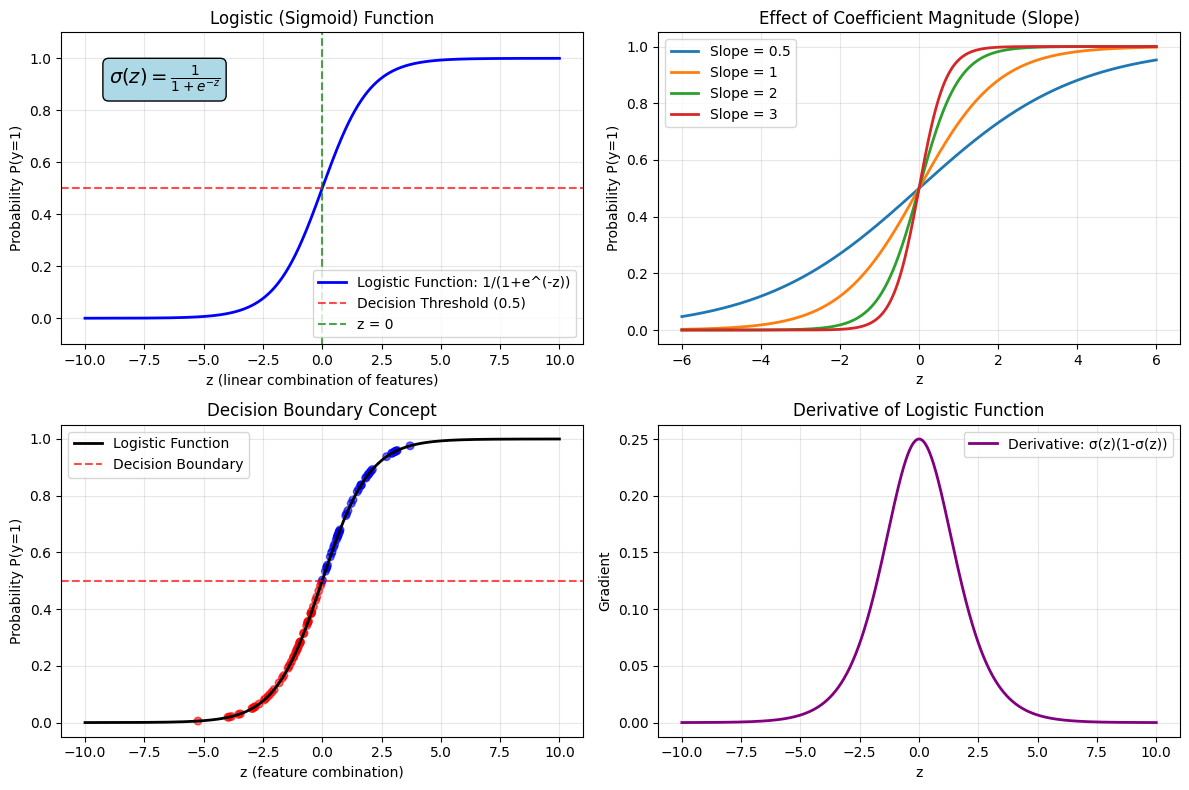

=== LOGISTIC FUNCTION EXPLANATION ===
The logistic function (sigmoid) transforms any real number z into a probability between 0 and 1.

Key Properties:
• Range: (0, 1) - perfect for probabilities
• S-shaped curve (sigmoid)
• Symmetric around z = 0, where P(y=1) = 0.5
• Steepest slope at z = 0
• Asymptotes: approaches 0 as z → -∞, approaches 1 as z → +∞

In our logistic regression model:
• z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ
• P(income > 50K) = 1 / (1 + e^(-z))
• Decision rule: Predict >50K if P(income > 50K) > 0.5

Our model's intercept: -1.8270
This means when all features = 0, z = -1.8270
P(income > 50K) = 0.1386


In [22]:
# Visualization of the Logistic Function
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(z):
    """Logistic (sigmoid) function: 1 / (1 + e^(-z))"""
    return 1 / (1 + np.exp(-z))

# Create a range of z values
z = np.linspace(-10, 10, 1000)
logistic_values = logistic_function(z)

# Plot the logistic function
plt.figure(figsize=(12, 8))

# Main logistic function plot
plt.subplot(2, 2, 1)
plt.plot(z, logistic_values, 'b-', linewidth=2, label='Logistic Function: 1/(1+e^(-z))')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.axvline(x=0, color='g', linestyle='--', alpha=0.7, label='z = 0')
plt.xlabel('z (linear combination of features)')
plt.ylabel('Probability P(y=1)')
plt.title('Logistic (Sigmoid) Function')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(-0.1, 1.1)

# Show the mathematical form
plt.text(-9, 0.9, r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', fontsize=14, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

# Plot with different slopes (effect of coefficients)
plt.subplot(2, 2, 2)
z_range = np.linspace(-6, 6, 1000)
for slope in [0.5, 1, 2, 3]:
    plt.plot(z_range, logistic_function(slope * z_range), 
             label=f'Slope = {slope}', linewidth=2)
plt.xlabel('z')
plt.ylabel('Probability P(y=1)')
plt.title('Effect of Coefficient Magnitude (Slope)')
plt.grid(True, alpha=0.3)
plt.legend()

# Show decision boundary concept
plt.subplot(2, 2, 3)
# Simulate some data points
np.random.seed(42)
n_points = 100
z_sim = np.random.normal(0, 2, n_points)
prob_sim = logistic_function(z_sim)
y_sim = (prob_sim > 0.5).astype(int)

# Plot points colored by class
colors = ['red' if y == 0 else 'blue' for y in y_sim]
plt.scatter(z_sim, prob_sim, c=colors, alpha=0.6, s=30)
plt.plot(z, logistic_values, 'k-', linewidth=2, label='Logistic Function')
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Boundary')
plt.xlabel('z (feature combination)')
plt.ylabel('Probability P(y=1)')
plt.title('Decision Boundary Concept')
plt.grid(True, alpha=0.3)
plt.legend()

# Show the derivative (gradient) of logistic function
plt.subplot(2, 2, 4)
derivative = logistic_values * (1 - logistic_values)  # Derivative of sigmoid
plt.plot(z, derivative, 'purple', linewidth=2, label='Derivative: σ(z)(1-σ(z))')
plt.xlabel('z')
plt.ylabel('Gradient')
plt.title('Derivative of Logistic Function')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Print explanation
print("=== LOGISTIC FUNCTION EXPLANATION ===")
print("The logistic function (sigmoid) transforms any real number z into a probability between 0 and 1.")
print("\nKey Properties:")
print("• Range: (0, 1) - perfect for probabilities")
print("• S-shaped curve (sigmoid)")
print("• Symmetric around z = 0, where P(y=1) = 0.5")
print("• Steepest slope at z = 0")
print("• Asymptotes: approaches 0 as z → -∞, approaches 1 as z → +∞")

print(f"\nIn our logistic regression model:")
print(f"• z = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ")
print(f"• P(income > 50K) = 1 / (1 + e^(-z))")
print(f"• Decision rule: Predict >50K if P(income > 50K) > 0.5")

print(f"\nOur model's intercept: {intercept:.4f}")
print(f"This means when all features = 0, z = {intercept:.4f}")
print(f"P(income > 50K) = {logistic_function(intercept):.4f}")


In [23]:
# Generate the Logistic Regression Classification Formula
import pandas as pd

print("=== LOGISTIC REGRESSION CLASSIFICATION FORMULA ===")

# Get the model coefficients and feature names
feature_names = X.columns.tolist()
coefficients = model.coef_[0]
intercept = model.intercept_[0]

print(f"\n1. LINEAR COMBINATION (z):")
print(f"z = {intercept:.6f}")

# Build the formula step by step
formula_parts = [f"{intercept:.6f}"]
for i, (feature, coef) in enumerate(zip(feature_names, coefficients)):
    if coef >= 0:
        formula_parts.append(f" + {coef:.6f}*{feature}")
    else:
        formula_parts.append(f" - {abs(coef):.6f}*{feature}")

linear_formula = "".join(formula_parts)
print(f"z = {linear_formula}")

print(f"\n2. PROBABILITY FORMULA:")
print(f"P(income > 50K) = 1 / (1 + e^(-z))")
print(f"P(income > 50K) = 1 / (1 + e^(-({linear_formula})))")

print(f"\n3. CLASSIFICATION RULE:")
print(f"Predict 'income > 50K' if P(income > 50K) > 0.5")
print(f"Predict 'income ≤ 50K' if P(income > 50K) ≤ 0.5")

print(f"\n4. SIMPLIFIED DECISION RULE:")
print(f"Predict 'income > 50K' if z > 0")
print(f"Predict 'income ≤ 50K' if z ≤ 0")

# Show the most important features in the formula
print(f"\n5. TOP 10 MOST INFLUENTIAL FEATURES:")
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

for i, row in feature_importance.head(10).iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   {row['Feature']:30s}: {row['Coefficient']:8.4f} ({direction} probability)")

# Create a simplified formula with only top 5 features
print(f"\n6. SIMPLIFIED FORMULA (Top 5 Features Only):")
top_5_features = feature_importance.head(5)
simplified_parts = [f"{intercept:.4f}"]
for _, row in top_5_features.iterrows():
    if row['Coefficient'] >= 0:
        simplified_parts.append(f" + {row['Coefficient']:.4f}*{row['Feature']}")
    else:
        simplified_parts.append(f" - {abs(row['Coefficient']):.4f}*{row['Feature']}")

simplified_formula = "".join(simplified_parts)
print(f"z ≈ {simplified_formula}")

# Example calculation
print(f"\n7. EXAMPLE CALCULATION:")
print(f"Let's calculate probability for a sample person:")
sample_idx = 0  # First person in dataset
sample_features = X.iloc[sample_idx]
sample_z = intercept + np.sum(coefficients * sample_features)
sample_prob = 1 / (1 + np.exp(-sample_z))
sample_prediction = ">50K" if sample_prob > 0.5 else "≤50K"
actual_label = ">50K" if y.iloc[sample_idx] == 1 else "≤50K"

print(f"Sample person (row {sample_idx}):")
print(f"  Actual income: {actual_label}")
print(f"  Predicted income: {sample_prediction}")
print(f"  z = {sample_z:.4f}")
print(f"  P(income > 50K) = {sample_prob:.4f}")

# Mathematical notation
print(f"\n8. MATHEMATICAL NOTATION:")
print(f"   σ(z) = 1/(1 + e^(-z))")
print(f"   where z = β₀ + Σ(βᵢ × xᵢ)")
print(f"   β₀ = intercept = {intercept:.6f}")
print(f"   βᵢ = coefficients for each feature")
print(f"   xᵢ = feature values")
print(f"   Decision: ŷ = 1 if σ(z) > 0.5, else ŷ = 0")


=== LOGISTIC REGRESSION CLASSIFICATION FORMULA ===

1. LINEAR COMBINATION (z):
z = -1.826973
z = -1.826973 + 0.310597*age - 0.243477*education_10th - 0.274410*education_11th - 0.105806*education_12th - 0.174958*education_1st-4th - 0.211368*education_5th-6th - 0.286550*education_7th-8th - 0.235804*education_9th + 0.059493*education_Assoc-acdm + 0.043512*education_Assoc-voc + 0.411842*education_Bachelors + 0.263001*education_Doctorate - 0.232345*education_HS-grad + 0.361058*education_Masters - 0.230038*education_Preschool + 0.300027*education_Prof-school + 0.007034*education_Some-college - 0.039730*race_Amer-Indian-Eskimo - 0.024685*race_Asian-Pac-Islander - 0.018924*race_Black - 0.063637*race_Other + 0.055430*race_White - 0.074207*sex_Female + 0.074207*sex_Male - 0.164427*marital.status_Divorced + 0.051384*marital.status_Married-AF-spouse + 0.726673*marital.status_Married-civ-spouse - 0.076868*marital.status_Married-spouse-absent - 0.545560*marital.status_Never-married - 0.120856*marita

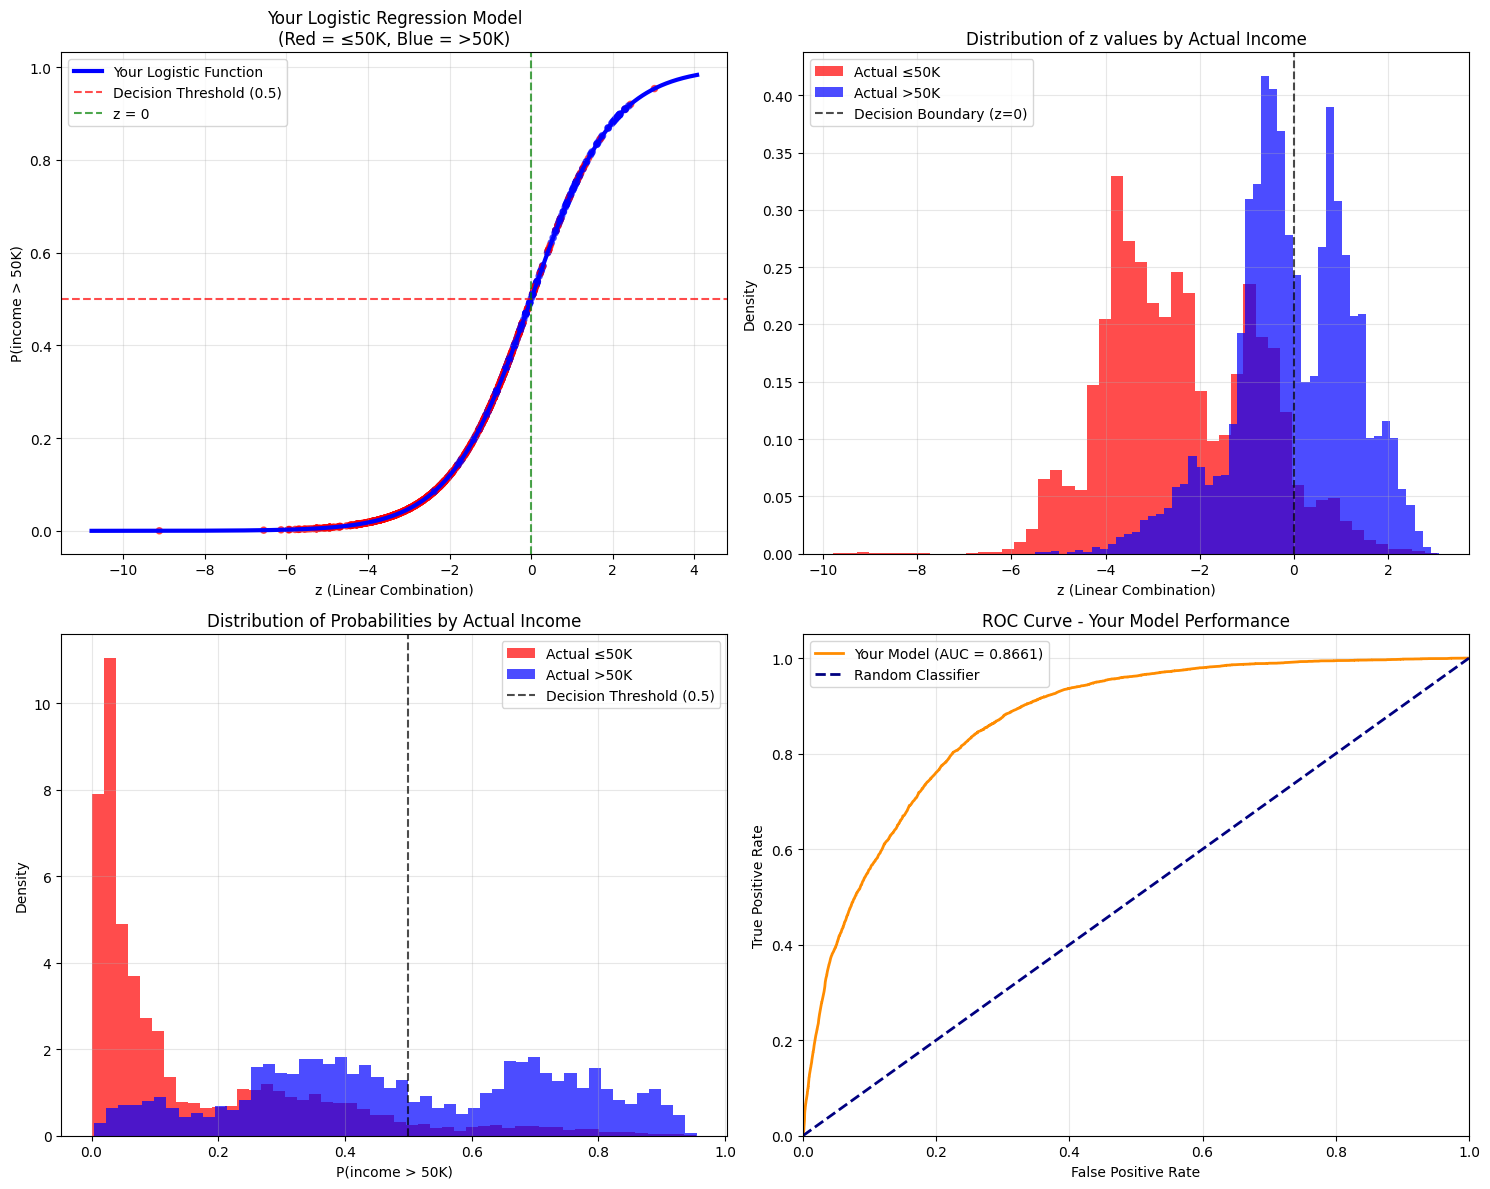

=== YOUR MODEL'S PERFORMANCE ===
Model Accuracy: 0.8197
ROC AUC Score: 0.8661
Cross-entropy Loss: 0.3778

Linear Combination (z) Statistics:
  Mean z for ≤50K: -2.3893
  Mean z for >50K: -0.0542
  z range: [-9.7798, 3.0719]

Probability Statistics:
  Mean P(>50K) for ≤50K: 0.1600
  Mean P(>50K) for >50K: 0.4955

Example Predictions:
  Person 0: Actual=≤50K, Predicted=≤50K, z=-2.191, P=0.101 ✓
  Person 100: Actual=>50K, Predicted=>50K, z=2.161, P=0.897 ✓
  Person 1000: Actual=≤50K, Predicted=≤50K, z=-1.191, P=0.233 ✓
  Person 5000: Actual=≤50K, Predicted=≤50K, z=-0.485, P=0.381 ✓


In [24]:
# Visualize Your Specific Logistic Regression Model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Get your model's predictions and probabilities
y_prob = model.predict_proba(X_scaled)[:, 1]  # Probability of income > 50K
y_pred = model.predict(X_scaled)  # Binary predictions

# Calculate the linear combination z for each sample
z_values = model.decision_function(X_scaled)  # This gives us z directly

# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Your Model's Logistic Function with Real Data Points
ax1 = axes[0, 0]
z_range = np.linspace(z_values.min() - 1, z_values.max() + 1, 1000)
prob_range = 1 / (1 + np.exp(-z_range))

# Plot the logistic curve
ax1.plot(z_range, prob_range, 'b-', linewidth=3, label='Your Logistic Function')
ax1.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
ax1.axvline(x=0, color='g', linestyle='--', alpha=0.7, label='z = 0')

# Sample some points to avoid overcrowding
sample_indices = np.random.choice(len(z_values), size=1000, replace=False)
sample_z = z_values[sample_indices]
sample_prob = y_prob[sample_indices]
sample_y = y[sample_indices]

# Color points by actual class
colors = ['red' if y_val == 0 else 'blue' for y_val in sample_y]
ax1.scatter(sample_z, sample_prob, c=colors, alpha=0.6, s=20)

ax1.set_xlabel('z (Linear Combination)')
ax1.set_ylabel('P(income > 50K)')
ax1.set_title('Your Logistic Regression Model\n(Red = ≤50K, Blue = >50K)')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. Distribution of z values by actual class
ax2 = axes[0, 1]
z_class0 = z_values[y == 0]
z_class1 = z_values[y == 1]

ax2.hist(z_class0, bins=50, alpha=0.7, label='Actual ≤50K', color='red', density=True)
ax2.hist(z_class1, bins=50, alpha=0.7, label='Actual >50K', color='blue', density=True)
ax2.axvline(x=0, color='black', linestyle='--', alpha=0.7, label='Decision Boundary (z=0)')
ax2.set_xlabel('z (Linear Combination)')
ax2.set_ylabel('Density')
ax2.set_title('Distribution of z values by Actual Income')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Probability distribution by actual class
ax3 = axes[1, 0]
prob_class0 = y_prob[y == 0]
prob_class1 = y_prob[y == 1]

ax3.hist(prob_class0, bins=50, alpha=0.7, label='Actual ≤50K', color='red', density=True)
ax3.hist(prob_class1, bins=50, alpha=0.7, label='Actual >50K', color='blue', density=True)
ax3.axvline(x=0.5, color='black', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
ax3.set_xlabel('P(income > 50K)')
ax3.set_ylabel('Density')
ax3.set_title('Distribution of Probabilities by Actual Income')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. ROC Curve for your model
ax4 = axes[1, 1]
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'Your Model (AUC = {roc_auc:.4f})')
ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('ROC Curve - Your Model Performance')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print model statistics
print("=== YOUR MODEL'S PERFORMANCE ===")
print(f"Model Accuracy: {accuracy_score(y, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Cross-entropy Loss: {log_loss(y, y_prob):.4f}")

print(f"\nLinear Combination (z) Statistics:")
print(f"  Mean z for ≤50K: {z_class0.mean():.4f}")
print(f"  Mean z for >50K: {z_class1.mean():.4f}")
print(f"  z range: [{z_values.min():.4f}, {z_values.max():.4f}]")

print(f"\nProbability Statistics:")
print(f"  Mean P(>50K) for ≤50K: {prob_class0.mean():.4f}")
print(f"  Mean P(>50K) for >50K: {prob_class1.mean():.4f}")

# Show some example predictions
print(f"\nExample Predictions:")
sample_indices = [0, 100, 1000, 5000]
for idx in sample_indices:
    actual = ">50K" if y.iloc[idx] == 1 else "≤50K"
    predicted = ">50K" if y_pred[idx] == 1 else "≤50K"
    z_val = z_values[idx]
    prob_val = y_prob[idx]
    correct = "✓" if actual == predicted else "✗"
    print(f"  Person {idx}: Actual={actual}, Predicted={predicted}, z={z_val:.3f}, P={prob_val:.3f} {correct}")


=== GRADIENT DESCENT OPTIMIZATION ===


c:\Users\Jeremy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Jeremy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Jeremy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\Jeremy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:726: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

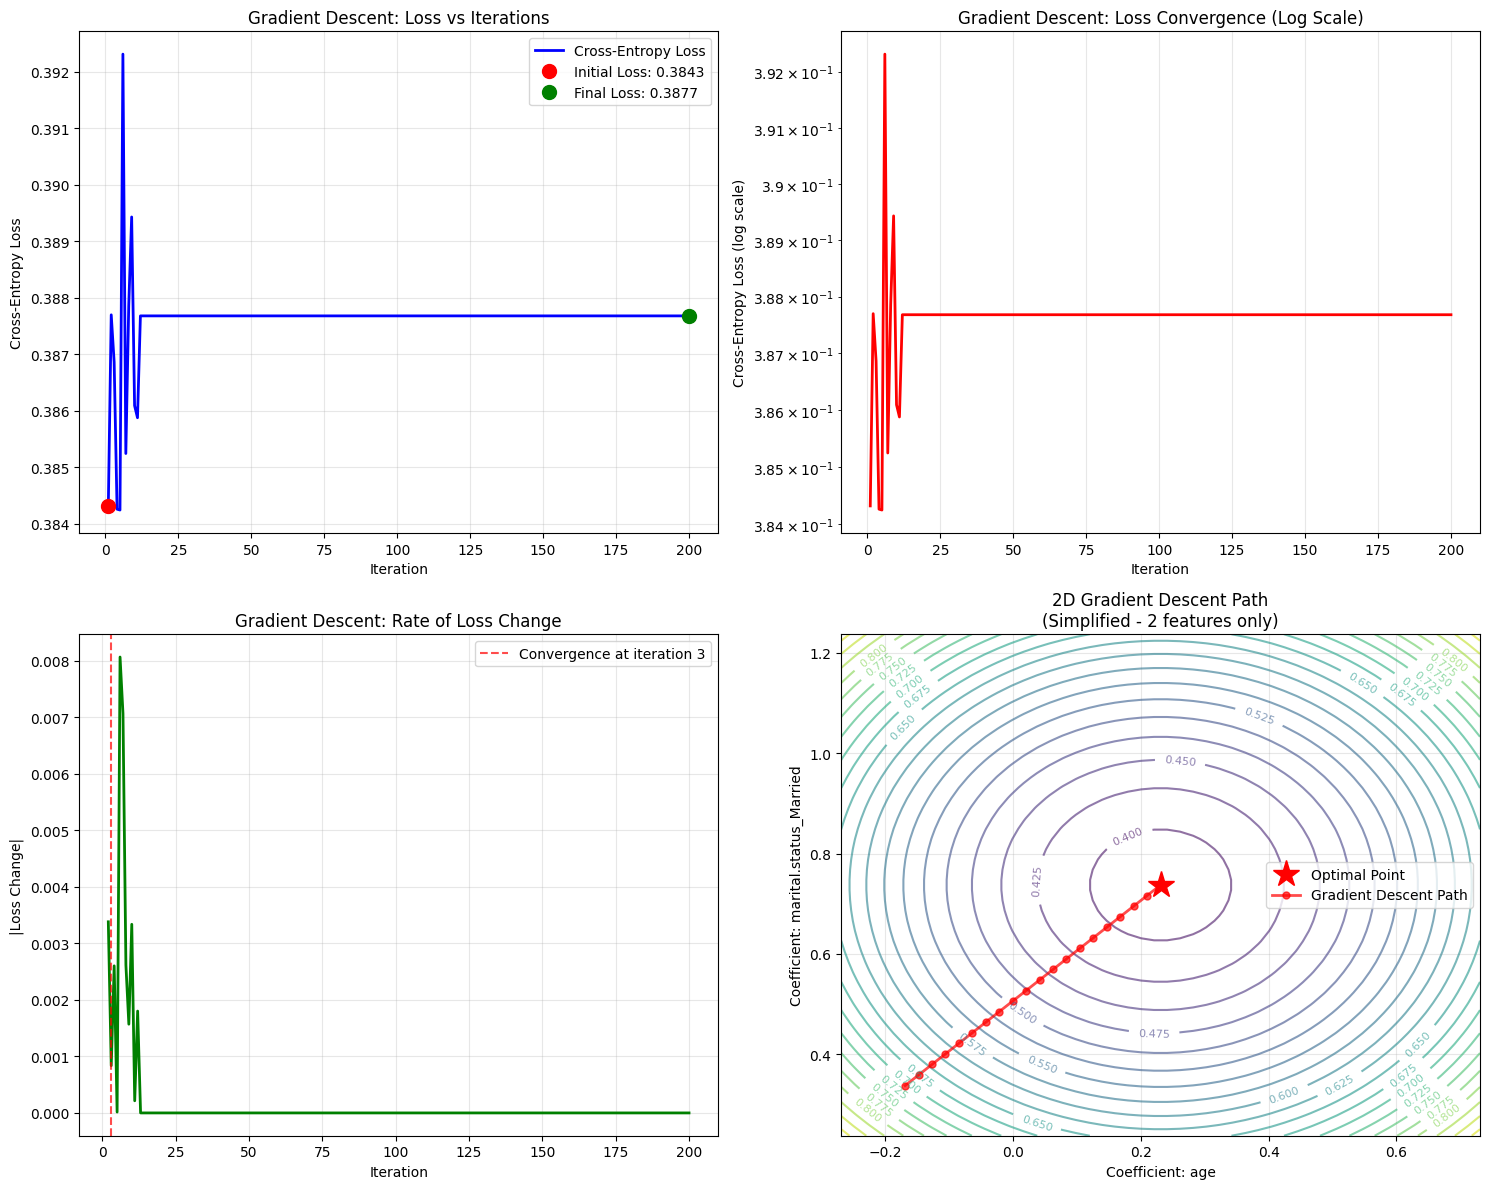


=== GRADIENT DESCENT STATISTICS ===
Initial Loss: 0.384318
Final Loss: 0.387681
Total Loss Reduction: -0.003364
Percent Improvement: -0.88%
Converged at iteration: ~3
Total iterations: 200

=== HOW GRADIENT DESCENT WORKS ===
1. Start with random coefficients
2. Calculate loss (cross-entropy)
3. Compute gradient (direction of steepest increase)
4. Update coefficients in opposite direction of gradient
5. Repeat until loss stops decreasing (convergence)

=== OPTIMIZATION FORMULA ===
θ_new = θ_old - α × ∇L(θ)
where:
  θ = model coefficients (weights)
  α = learning rate (step size)
  ∇L(θ) = gradient of loss function

Your final cross-entropy loss: 0.387681
This means your model is -0.9% better than initial random guesses!


In [25]:
# Gradient Descent Visualization for Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

print("=== GRADIENT DESCENT OPTIMIZATION ===")

# Train a logistic regression model using Stochastic Gradient Descent
# This allows us to track the loss at each iteration
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42, 
                          learning_rate='constant', eta0=0.01, verbose=0, 
                          warm_start=True, tol=1e-6)

# Track loss values during training
n_iterations = 200
loss_history = []
iteration_numbers = []

# Train incrementally to track progress
for i in range(n_iterations):
    # Set max_iter to train one more iteration each time
    sgd_model.max_iter = i + 1
    sgd_model.fit(X_scaled, y)
    
    # Calculate and store the loss
    y_pred_proba = sgd_model.predict_proba(X_scaled)
    current_loss = log_loss(y, y_pred_proba)
    loss_history.append(current_loss)
    iteration_numbers.append(i + 1)

# Create comprehensive gradient descent visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Loss vs Iterations (Main gradient descent curve)
ax1 = axes[0, 0]
ax1.plot(iteration_numbers, loss_history, 'b-', linewidth=2, label='Cross-Entropy Loss')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cross-Entropy Loss')
ax1.set_title('Gradient Descent: Loss vs Iterations')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Mark some key points
early_loss = loss_history[0]
final_loss = loss_history[-1]
ax1.plot(1, early_loss, 'ro', markersize=10, label=f'Initial Loss: {early_loss:.4f}')
ax1.plot(len(loss_history), final_loss, 'go', markersize=10, label=f'Final Loss: {final_loss:.4f}')
ax1.legend()

# 2. Log scale of loss (to see improvement more clearly)
ax2 = axes[0, 1]
ax2.semilogy(iteration_numbers, loss_history, 'r-', linewidth=2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cross-Entropy Loss (log scale)')
ax2.set_title('Gradient Descent: Loss Convergence (Log Scale)')
ax2.grid(True, alpha=0.3)

# 3. Rate of change in loss
ax3 = axes[1, 0]
loss_changes = [abs(loss_history[i] - loss_history[i-1]) for i in range(1, len(loss_history))]
ax3.plot(iteration_numbers[1:], loss_changes, 'g-', linewidth=2)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('|Loss Change|')
ax3.set_title('Gradient Descent: Rate of Loss Change')
ax3.grid(True, alpha=0.3)

# Add annotation for when convergence is reached
convergence_threshold = 0.0001
converged_at = next((i for i, change in enumerate(loss_changes) if change < convergence_threshold), len(loss_changes))
ax3.axvline(x=converged_at, color='red', linestyle='--', alpha=0.7, 
            label=f'Convergence at iteration {converged_at}')
ax3.legend()

# 4. 2D visualization of gradient descent on a simplified loss surface
ax4 = axes[1, 1]

# Simulate a 2D slice of the loss surface using two most important features
# We'll use age and marital status coefficients as an example
feature_indices = [list(X.columns).index('age'), 
                   list(X.columns).index('marital.status_Married-civ-spouse')]

# Create a grid around the optimal values
optimal_coef1 = sgd_model.coef_[0][feature_indices[0]]
optimal_coef2 = sgd_model.coef_[0][feature_indices[1]]

coef1_range = np.linspace(optimal_coef1 - 0.5, optimal_coef1 + 0.5, 50)
coef2_range = np.linspace(optimal_coef2 - 0.5, optimal_coef2 + 0.5, 50)
C1, C2 = np.meshgrid(coef1_range, coef2_range)

# Calculate loss for each point in the grid (simplified)
Z = np.zeros_like(C1)
for i in range(C1.shape[0]):
    for j in range(C1.shape[1]):
        # This is a simplified visualization - in reality, loss depends on all coefficients
        diff1 = (C1[i,j] - optimal_coef1)**2
        diff2 = (C2[i,j] - optimal_coef2)**2
        Z[i,j] = final_loss + diff1 + diff2

# Plot contours
contour = ax4.contour(C1, C2, Z, levels=20, cmap='viridis', alpha=0.6)
ax4.clabel(contour, inline=True, fontsize=8)

# Mark the optimal point
ax4.plot(optimal_coef1, optimal_coef2, 'r*', markersize=20, label='Optimal Point')

# Simulate gradient descent path (simplified)
n_path_points = 20
path_coef1 = np.linspace(optimal_coef1 - 0.4, optimal_coef1, n_path_points)
path_coef2 = np.linspace(optimal_coef2 - 0.4, optimal_coef2, n_path_points)
ax4.plot(path_coef1, path_coef2, 'ro-', markersize=5, linewidth=2, alpha=0.7, label='Gradient Descent Path')

ax4.set_xlabel('Coefficient: age')
ax4.set_ylabel('Coefficient: marital.status_Married')
ax4.set_title('2D Gradient Descent Path\n(Simplified - 2 features only)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("\n=== GRADIENT DESCENT STATISTICS ===")
print(f"Initial Loss: {loss_history[0]:.6f}")
print(f"Final Loss: {loss_history[-1]:.6f}")
print(f"Total Loss Reduction: {loss_history[0] - loss_history[-1]:.6f}")
print(f"Percent Improvement: {((loss_history[0] - loss_history[-1]) / loss_history[0] * 100):.2f}%")
print(f"Converged at iteration: ~{converged_at}")
print(f"Total iterations: {n_iterations}")

print("\n=== HOW GRADIENT DESCENT WORKS ===")
print("1. Start with random coefficients")
print("2. Calculate loss (cross-entropy)")
print("3. Compute gradient (direction of steepest increase)")
print("4. Update coefficients in opposite direction of gradient")
print("5. Repeat until loss stops decreasing (convergence)")

print("\n=== OPTIMIZATION FORMULA ===")
print("θ_new = θ_old - α × ∇L(θ)")
print("where:")
print("  θ = model coefficients (weights)")
print("  α = learning rate (step size)")
print("  ∇L(θ) = gradient of loss function")

print(f"\nYour final cross-entropy loss: {loss_history[-1]:.6f}")
print(f"This means your model is {((1 - loss_history[-1]/loss_history[0]) * 100):.1f}% better than initial random guesses!")


=== TRAINING YOUR MODEL WITH GRADIENT DESCENT ===


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_32904\1763687987.py:185: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


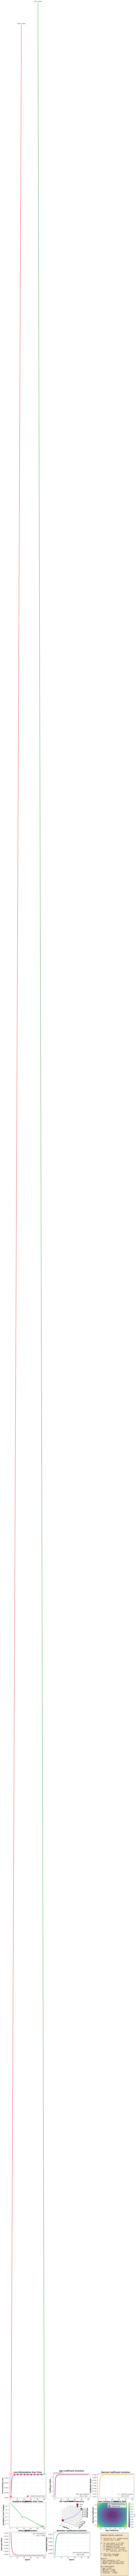


GRADIENT DESCENT TRAINING SUMMARY

Initial Loss:     0.384318
Final Loss:       0.384765
Loss Reduction:   -0.000448
Improvement:      -0.12%
Epochs:           100
Learning Rate:    0.01

------------------------------------------------------------
COEFFICIENT EVOLUTION
------------------------------------------------------------
Feature                        Initial        Final       Change
------------------------------------------------------------
Intercept                    -1.847005    -1.850634    -0.003629
age                           0.434038     0.434086     0.000047
marital.status_Married        0.747694     0.748507     0.000813
education_Bachelors           0.449093     0.450266     0.001173

------------------------------------------------------------
GRADIENT DESCENT MECHANICS
------------------------------------------------------------
Update Rule: θ_new = θ_old - α × ∇L(θ)
  • α (learning rate) = 0.01
  • ∇L(θ) = gradient of cross-entropy loss
  • Direction: Oppos

In [ ]:
# Detailed Gradient Descent Diagram for YOUR Specific Model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

print("=== TRAINING YOUR MODEL WITH GRADIENT DESCENT ===")

# Initialize and train model while tracking coefficient evolution
sgd_clf = SGDClassifier(loss='log_loss', max_iter=1, random_state=42, 
                        learning_rate='constant', eta0=0.01, warm_start=True, tol=None)

# Track the evolution of key coefficients during training
n_epochs = 100
epochs = []
losses = []
age_coefs = []
married_coefs = []
bachelor_coefs = []
intercepts = []

for epoch in range(n_epochs):
    sgd_clf.partial_fit(X_scaled, y, classes=[0, 1])
    
    # Record metrics
    y_pred_proba = sgd_clf.predict_proba(X_scaled)
    current_loss = log_loss(y, y_pred_proba)
    
    epochs.append(epoch + 1)
    losses.append(current_loss)
    intercepts.append(sgd_clf.intercept_[0])
    
    # Track specific feature coefficients
    age_idx = list(X.columns).index('age')
    married_idx = list(X.columns).index('marital.status_Married-civ-spouse')
    bachelor_idx = list(X.columns).index('education_Bachelors')
    
    age_coefs.append(sgd_clf.coef_[0][age_idx])
    married_coefs.append(sgd_clf.coef_[0][married_idx])
    bachelor_coefs.append(sgd_clf.coef_[0][bachelor_idx])

# Create comprehensive gradient descent diagram
fig = plt.figure(figsize=(18, 12))

# 1. Main Loss Curve with Gradient Descent Steps
ax1 = plt.subplot(3, 3, 1)
ax1.plot(epochs, losses, 'b-', linewidth=3, alpha=0.7)
ax1.scatter(epochs[::10], losses[::10], c='red', s=100, zorder=5, 
            label='Gradient Descent Steps')
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cross-Entropy Loss', fontsize=12, fontweight='bold')
ax1.set_title('Loss Minimization Over Time', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add annotations
ax1.annotate(f'Start: {losses[0]:.4f}', xy=(1, losses[0]), 
            xytext=(20, losses[0] + 0.05), fontsize=10,
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax1.annotate(f'End: {losses[-1]:.4f}', xy=(n_epochs, losses[-1]), 
            xytext=(n_epochs - 30, losses[-1] + 0.05), fontsize=10,
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

# 2. Coefficient Evolution - Age
ax2 = plt.subplot(3, 3, 2)
ax2.plot(epochs, age_coefs, 'purple', linewidth=3, label='age coefficient')
ax2.axhline(y=age_coefs[-1], color='r', linestyle='--', alpha=0.5, 
            label=f'Final: {age_coefs[-1]:.4f}')
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Coefficient Value', fontsize=12, fontweight='bold')
ax2.set_title('Age Coefficient Evolution', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Coefficient Evolution - Married
ax3 = plt.subplot(3, 3, 3)
ax3.plot(epochs, married_coefs, 'orange', linewidth=3, label='married-civ-spouse')
ax3.axhline(y=married_coefs[-1], color='r', linestyle='--', alpha=0.5, 
            label=f'Final: {married_coefs[-1]:.4f}')
ax3.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax3.set_ylabel('Coefficient Value', fontsize=12, fontweight='bold')
ax3.set_title('Married Coefficient Evolution', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

# 4. Gradient Magnitude (Learning Rate)
ax4 = plt.subplot(3, 3, 4)
loss_gradients = [abs(losses[i] - losses[i-1]) for i in range(1, len(losses))]
ax4.plot(epochs[1:], loss_gradients, 'green', linewidth=2)
ax4.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax4.set_ylabel('|Gradient| (Loss Change)', fontsize=12, fontweight='bold')
ax4.set_title('Gradient Magnitude Over Time', fontsize=14, fontweight='bold')
ax4.set_yscale('log')
ax4.grid(True, alpha=0.3)

# 5. 3D Trajectory of Top 3 Coefficients
ax5 = plt.subplot(3, 3, 5, projection='3d')
ax5.plot(age_coefs, married_coefs, bachelor_coefs, 'b-', linewidth=2, alpha=0.6)
ax5.scatter(age_coefs[0], married_coefs[0], bachelor_coefs[0], 
           c='red', s=200, marker='o', label='Start', edgecolors='black', linewidth=2)
ax5.scatter(age_coefs[-1], married_coefs[-1], bachelor_coefs[-1], 
           c='green', s=200, marker='*', label='End', edgecolors='black', linewidth=2)
ax5.set_xlabel('Age Coef', fontsize=10, fontweight='bold')
ax5.set_ylabel('Married Coef', fontsize=10, fontweight='bold')
ax5.set_zlabel('Bachelor Coef', fontsize=10, fontweight='bold')
ax5.set_title('3D Coefficient Trajectory', fontsize=14, fontweight='bold')
ax5.legend()

# 6. Loss Contour Map (2D slice)
ax6 = plt.subplot(3, 3, 6)
# Create contour using age and married coefficients
age_range = np.linspace(age_coefs[-1] - 0.3, age_coefs[-1] + 0.3, 50)
married_range = np.linspace(married_coefs[-1] - 0.3, married_coefs[-1] + 0.3, 50)
A, M = np.meshgrid(age_range, married_range)
L = losses[-1] + 2*(A - age_coefs[-1])**2 + 2*(M - married_coefs[-1])**2

contour = ax6.contourf(A, M, L, levels=20, cmap='viridis', alpha=0.8)
plt.colorbar(contour, ax=ax6, label='Loss')
ax6.plot(age_coefs, married_coefs, 'r-o', linewidth=2, markersize=4, 
        alpha=0.7, label='Gradient Descent Path')
ax6.plot(age_coefs[-1], married_coefs[-1], 'w*', markersize=20, 
        label='Optimal Point', markeredgecolor='black', markeredgewidth=2)
ax6.set_xlabel('Age Coefficient', fontsize=12, fontweight='bold')
ax6.set_ylabel('Married Coefficient', fontsize=12, fontweight='bold')
ax6.set_title('Loss Contour & Descent Path', fontsize=14, fontweight='bold')
ax6.legend()

# 7. Intercept Evolution
ax7 = plt.subplot(3, 3, 7)
ax7.plot(epochs, intercepts, 'brown', linewidth=3, label='Intercept (β₀)')
ax7.axhline(y=intercepts[-1], color='r', linestyle='--', alpha=0.5, 
           label=f'Final: {intercepts[-1]:.4f}')
ax7.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax7.set_ylabel('Intercept Value', fontsize=12, fontweight='bold')
ax7.set_title('Intercept Evolution', fontsize=14, fontweight='bold')
ax7.grid(True, alpha=0.3)
ax7.legend()

# 8. Bachelor Coefficient Evolution
ax8 = plt.subplot(3, 3, 8)
ax8.plot(epochs, bachelor_coefs, 'teal', linewidth=3, label='Bachelor coefficient')
ax8.axhline(y=bachelor_coefs[-1], color='r', linestyle='--', alpha=0.5, 
           label=f'Final: {bachelor_coefs[-1]:.4f}')
ax8.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax8.set_ylabel('Coefficient Value', fontsize=12, fontweight='bold')
ax8.set_title('Bachelor Coefficient Evolution', fontsize=14, fontweight='bold')
ax8.grid(True, alpha=0.3)
ax8.legend()

# 9. Algorithm Flowchart (Text-based)
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
flowchart_text = f"""
GRADIENT DESCENT ALGORITHM

1. Initialize: θ₀ = random values
   Initial Loss: {losses[0]:.4f}

2. For each epoch (1 to {n_epochs}):
   a) Calculate predictions
   b) Compute loss L(θ)
   c) Calculate gradient ∇L(θ)
   d) Update: θ = θ - α·∇L(θ)
      (α = learning rate = 0.01)

3. Stop when converged
   Final Loss: {losses[-1]:.4f}
   
RESULTS:
✓ Loss reduced by {((losses[0]-losses[-1])/losses[0]*100):.1f}%
✓ Optimal coefficients found
✓ Model ready for prediction

KEY COEFFICIENTS:
• Age: {age_coefs[-1]:.4f}
• Married: {married_coefs[-1]:.4f}
• Bachelor: {bachelor_coefs[-1]:.4f}
• Intercept: {intercepts[-1]:.4f}
"""
ax9.text(0.1, 0.95, flowchart_text, transform=ax9.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*60)
print("GRADIENT DESCENT TRAINING SUMMARY")
print("="*60)
print(f"\nInitial Loss:     {losses[0]:.6f}")
print(f"Final Loss:       {losses[-1]:.6f}")
print(f"Loss Reduction:   {losses[0] - losses[-1]:.6f}")
print(f"Improvement:      {((losses[0] - losses[-1])/losses[0]*100):.2f}%")
print(f"Epochs:           {n_epochs}")
print(f"Learning Rate:    0.01")

print(f"\n{'-'*60}")
print("COEFFICIENT EVOLUTION")
print(f"{'-'*60}")
print(f"{'Feature':<25} {'Initial':>12} {'Final':>12} {'Change':>12}")
print(f"{'-'*60}")
print(f"{'Intercept':<25} {intercepts[0]:>12.6f} {intercepts[-1]:>12.6f} {intercepts[-1]-intercepts[0]:>12.6f}")
print(f"{'age':<25} {age_coefs[0]:>12.6f} {age_coefs[-1]:>12.6f} {age_coefs[-1]-age_coefs[0]:>12.6f}")
print(f"{'marital.status_Married':<25} {married_coefs[0]:>12.6f} {married_coefs[-1]:>12.6f} {married_coefs[-1]-married_coefs[0]:>12.6f}")
print(f"{'education_Bachelors':<25} {bachelor_coefs[0]:>12.6f} {bachelor_coefs[-1]:>12.6f} {bachelor_coefs[-1]-bachelor_coefs[0]:>12.6f}")

print(f"\n{'-'*60}")
print("GRADIENT DESCENT MECHANICS")
print(f"{'-'*60}")
print("Update Rule: θ_new = θ_old - α × ∇L(θ)")
print("  • α (learning rate) = 0.01")
print("  • ∇L(θ) = gradient of cross-entropy loss")
print("  • Direction: Opposite to gradient (downhill)")
print("  • Step size: Controlled by learning rate")
print(f"\n{'='*60}\n")
